In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
train = pd.read_csv('train.csv', parse_dates=['datetime'])

In [5]:
train_label = pd.read_csv('train_label.csv', header = None)

In [6]:
train['label'] = train_label

In [7]:
print(train.corr().label)

holiday      -0.004391
workingday    0.012285
temp          0.397456
atemp         0.392754
humidity     -0.307982
windspeed     0.092090
label         1.000000
Name: label, dtype: float64


In [8]:
train.drop(['holiday'], axis=1, inplace=True)

In [9]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Text(0.5, 0, 'temperature_felt.png')

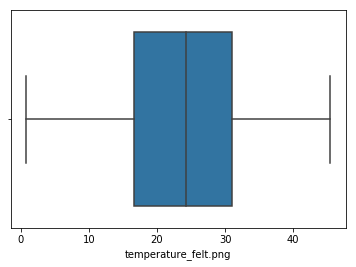

In [14]:
# sns.boxplot(train.label)
# plt.xlabel('booking fares')
# plt.savefig('booking.png')

# sns.boxplot(train.temp)
# plt.xlabel('temperature')
# plt.savefig('temperature.png')
sns.boxplot(train.atemp)
plt.xlabel('temperature_felt.png')
plt.savefig('temperature_felt.png')

Text(0.5, 0, 'windspeed')

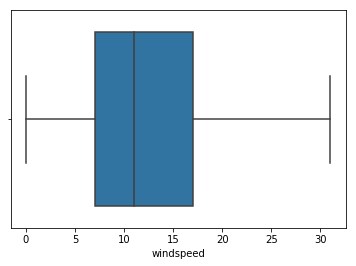

In [17]:
sns.boxplot(train.windspeed)
plt.xlabel('windspeed')
plt.savefig('windspeed.png')

In [60]:
# ## now not to remove outliers from target variables













# # knowing outliers in label column
# q1 = train.label.quantile(0.25)
# q2 = train.label.quantile(0.75)
# IQR = q2-q1
# train = train[train.label < (q2 + (1.5*IQR))]

In [16]:
# removing outliers of windspeed column

q1 = train.windspeed.quantile(0.25)
q2 = train.windspeed.quantile(0.75)
IQR = q2-q1
train = train[train.windspeed < (q2 + (1.5*IQR))]

In [62]:
train = train.join(pd.get_dummies(train.weather))
train.drop('weather', axis=1, inplace = True)

In [63]:
train = train.join(pd.get_dummies(train.season))
train.drop('season', axis= 1, inplace = True)

In [64]:
df = pd.DataFrame(train.datetime.dt.year)
df['label'] = train.label
df.corr()

,datetime,label
datetime,1.000000,0.265171
label,0.265171,1.000000


In [65]:
train = train.join(pd.get_dummies(train.datetime.dt.year))

In [66]:
df = pd.DataFrame(train.datetime.dt.month)
df['label'] = train.label
df.corr()

,datetime,label
datetime,1.000000,0.167195
label,0.167195,1.000000


In [67]:
train = train.join(pd.get_dummies(train.datetime.dt.month, prefix='month'))


In [68]:
train.datetime.dt.month.unique()

array([ 5,  9,  1, 11,  8, 10,  7,  2,  3,  6, 12,  4], dtype=int64)

,datetime,label
datetime,1.000000,-0.005734
label,-0.005734,1.000000


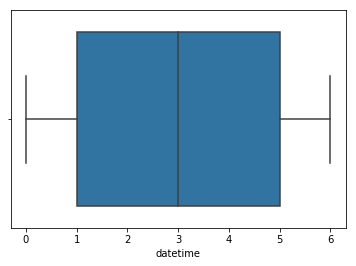

In [69]:
df = pd.DataFrame(train.datetime.dt.dayofweek)
df['label'] = train.label
df.corr()
sns.boxplot(df.datetime)

In [70]:
train = train.join(pd.get_dummies(train.datetime.dt.dayofweek, prefix = 'week'))

          datetime     label
datetime  1.000000  0.163267
label     0.163267  1.000000


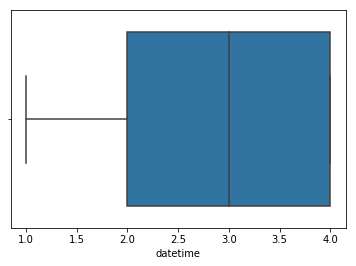

In [71]:
df = pd.DataFrame(train.datetime.dt.quarter)

df['label'] = train.label

print(df.corr())
sns.boxplot(df.datetime)


In [72]:
train = train.join(pd.get_dummies(train.datetime.dt.quarter, prefix = 'quarter'))

          datetime     label
datetime  1.000000  0.024709
label     0.024709  1.000000


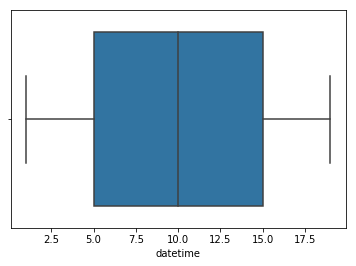

In [73]:
df = pd.DataFrame(train.datetime.dt.day)
df['label'] = train.label
print(df.corr())
sns.boxplot(df.datetime)

In [74]:
train = train.join(pd.get_dummies(train.datetime.dt.day, prefix='day'))

In [75]:
train.datetime.dt.day.unique()

array([ 2,  5, 13, 18, 17,  6, 10, 14,  9, 19, 12,  7,  3,  4, 11,  1, 16,
       15,  8], dtype=int64)

In [18]:
df = pd.DataFrame(train.datetime.dt.hour)
df['label'] = train.label
print(df.corr())
# sns.boxplot(df.datetime)

          datetime     label
datetime  1.000000  0.403229
label     0.403229  1.000000


In [77]:
train.datetime.dt.hour.nunique()

24

In [78]:
train = train.join(pd.get_dummies(train.datetime.dt.hour, prefix='hour'))

          datetime     label
datetime  1.000000  0.153475
label     0.153475  1.000000


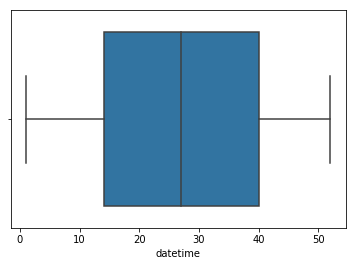

In [19]:
df = pd.DataFrame(train.datetime.dt.weekofyear)
df['label'] = train.label
print(df.corr())
sns.boxplot(df.datetime)

In [80]:
train = train.join(pd.get_dummies(train.datetime.dt.weekofyear, prefix='week_no'))

In [81]:
train.datetime.dt.weekofyear.nunique()

46

# Scaling of data(temp, atemp, humidity)

In [82]:
# from sklearn.preprocessing import StandardScaler

In [83]:
# sc = StandardScaler()

In [84]:
# train.temp = sc.fit_transform(train[['temp']])

In [85]:
# train.atemp = sc.fit_transform(train[['atemp']])

In [86]:
# train.humidity = sc.fit_transform(train[['humidity']])
# train.windspeed = sc.fit_transform(train[['windspeed']])

In [87]:
train.to_csv('cleaned_train.csv', index=False)

In [88]:
train

,datetime,workingday,temp,atemp,humidity,windspeed,label,Clear + Few clouds,Heavy Rain + Thunderstorm,"Light Snow, Light Rain",...,week_no_42,week_no_44,week_no_45,week_no_46,week_no_47,week_no_48,week_no_49,week_no_50,week_no_51,week_no_52
0,2012-05-02 19:00:00,1,22.14,25.760,77,16.9979,504,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2012-09-05 04:00:00,1,28.70,33.335,79,19.0012,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2011-01-13 09:00:00,1,5.74,6.060,50,22.0028,139,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2011-11-18 16:00:00,1,13.94,16.665,29,8.9981,209,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2011-09-13 13:00:00,1,30.34,33.335,51,19.0012,184,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2012-08-17 17:00:00,1,33.62,12.120,36,22.0028,791,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2012-10-06 09:00:00,0,24.60,29.545,73,12.9980,395,1,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2012-09-10 04:00:00,1,21.32,25.000,68,19.0012,5,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2012-07-14 04:00:00,0,27.06,31.060,61,7.0015,9,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,2011-02-06 18:00:00,0,12.30,15.150,56,11.0014,78,1,0,0,...,0,0,0,0,0,0,0,0,0,0
